In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns

In [6]:
uploaded = files.upload()

Saving dataset_Facebook - dataset_Facebook.csv.csv to dataset_Facebook - dataset_Facebook.csv.csv


In [7]:
# Load data
data = pd.read_csv(io.BytesIO(uploaded['dataset_Facebook - dataset_Facebook.csv.csv']))
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumption,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [8]:
# Extract columns
paid_reach = data[data['Paid'] == 1]['Lifetime Post Total Reach']
unpaid_reach = data[data['Paid'] == 0]['Lifetime Post Total Reach']

In [9]:
# Perform t-test
t_stat, p_value = ttest_ind(paid_reach, unpaid_reach)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

T-statistic: 3.30
P-value: 0.00


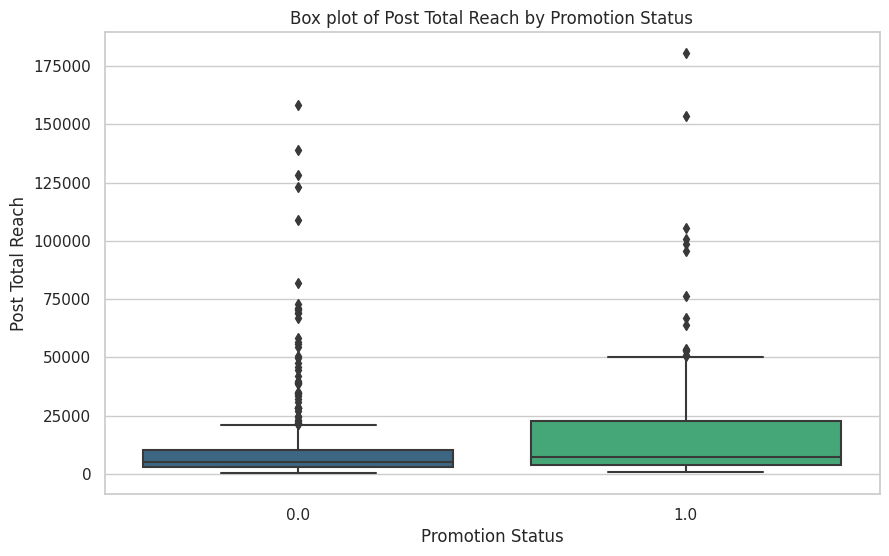

In [10]:
# Plot histogram
# Set style
sns.set(style="whitegrid")

# Create box plots for points_per_game grouped by player_position
plt.figure(figsize=(10,6))
sns.boxplot(x='Paid', y='Lifetime Post Total Reach', data=data, palette='viridis')
plt.title('Box plot of Post Total Reach by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Post Total Reach')
plt.show()

<Axes: xlabel='Paid', ylabel='Lifetime Post Total Reach'>

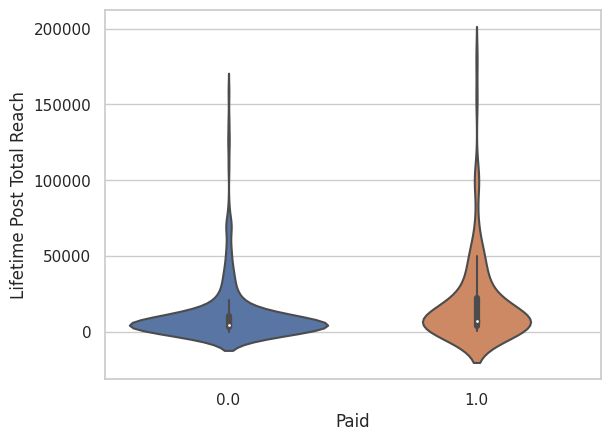

In [11]:
# Plot violin plot
sns.violinplot(data=data, x="Paid", y="Lifetime Post Total Reach")

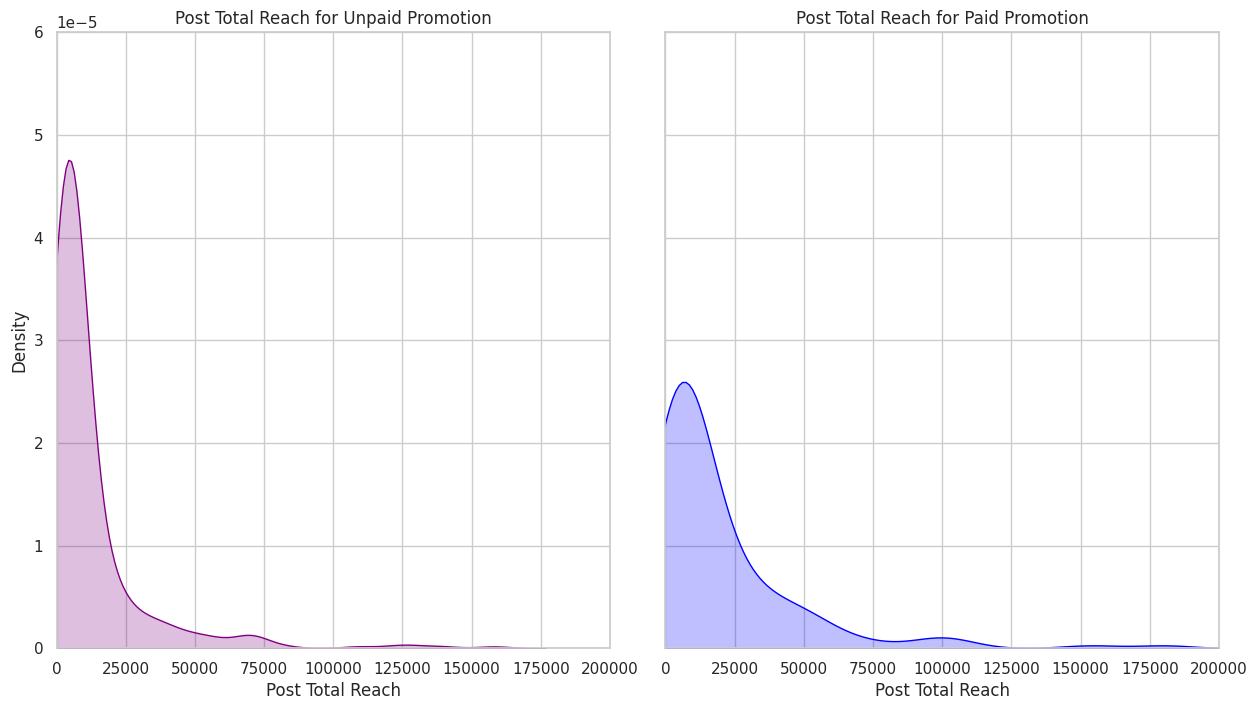

In [12]:
# Plot density curve
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharex=True, sharey=True)

plt.subplot(1, 2, 1)
sns.kdeplot(unpaid_reach, fill=True, color='purple')
plt.xlabel("Post Total Reach")
plt.ylabel("Density")
plt.title("Post Total Reach for Unpaid Promotion")
plt.xlim(0, 200000)
plt.ylim(0, 0.00006)
plt.subplots_adjust(hspace=.2)
plt.subplots_adjust(wspace=.1)

plt.subplot(1, 2, 2)
sns.kdeplot(paid_reach, fill=True, color='blue')
plt.xlabel("Post Total Reach")
plt.ylabel("Density")
plt.title("Post Total Reach for Paid Promotion")
plt.xlim(0, 200000)
plt.ylim(0, 0.00006)
plt.subplots_adjust(hspace=.2)
plt.subplots_adjust(wspace=.1)

# Show the plot
plt.show()